## Project 2 - Wines Classification

I have a clean dataset from Kaggle.

1. Exploratory Data Analysis (EDA)
2. Building several different models using scaling and PCA to get best resultats
3. Using Eli library for interpretation

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('datasets_4458_8204_winequality-red.csv')
df=data.copy()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 1. Basic cleaning & EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
#df.isnull().sum()
df.isna().any().any()

False

In [10]:
# Dropping duplicates
df = df.drop_duplicates()
df.shape

(1359, 12)

In [ ]:
#Dataset looks pretty clean, after dropping duplicates, I will keep it as it is.

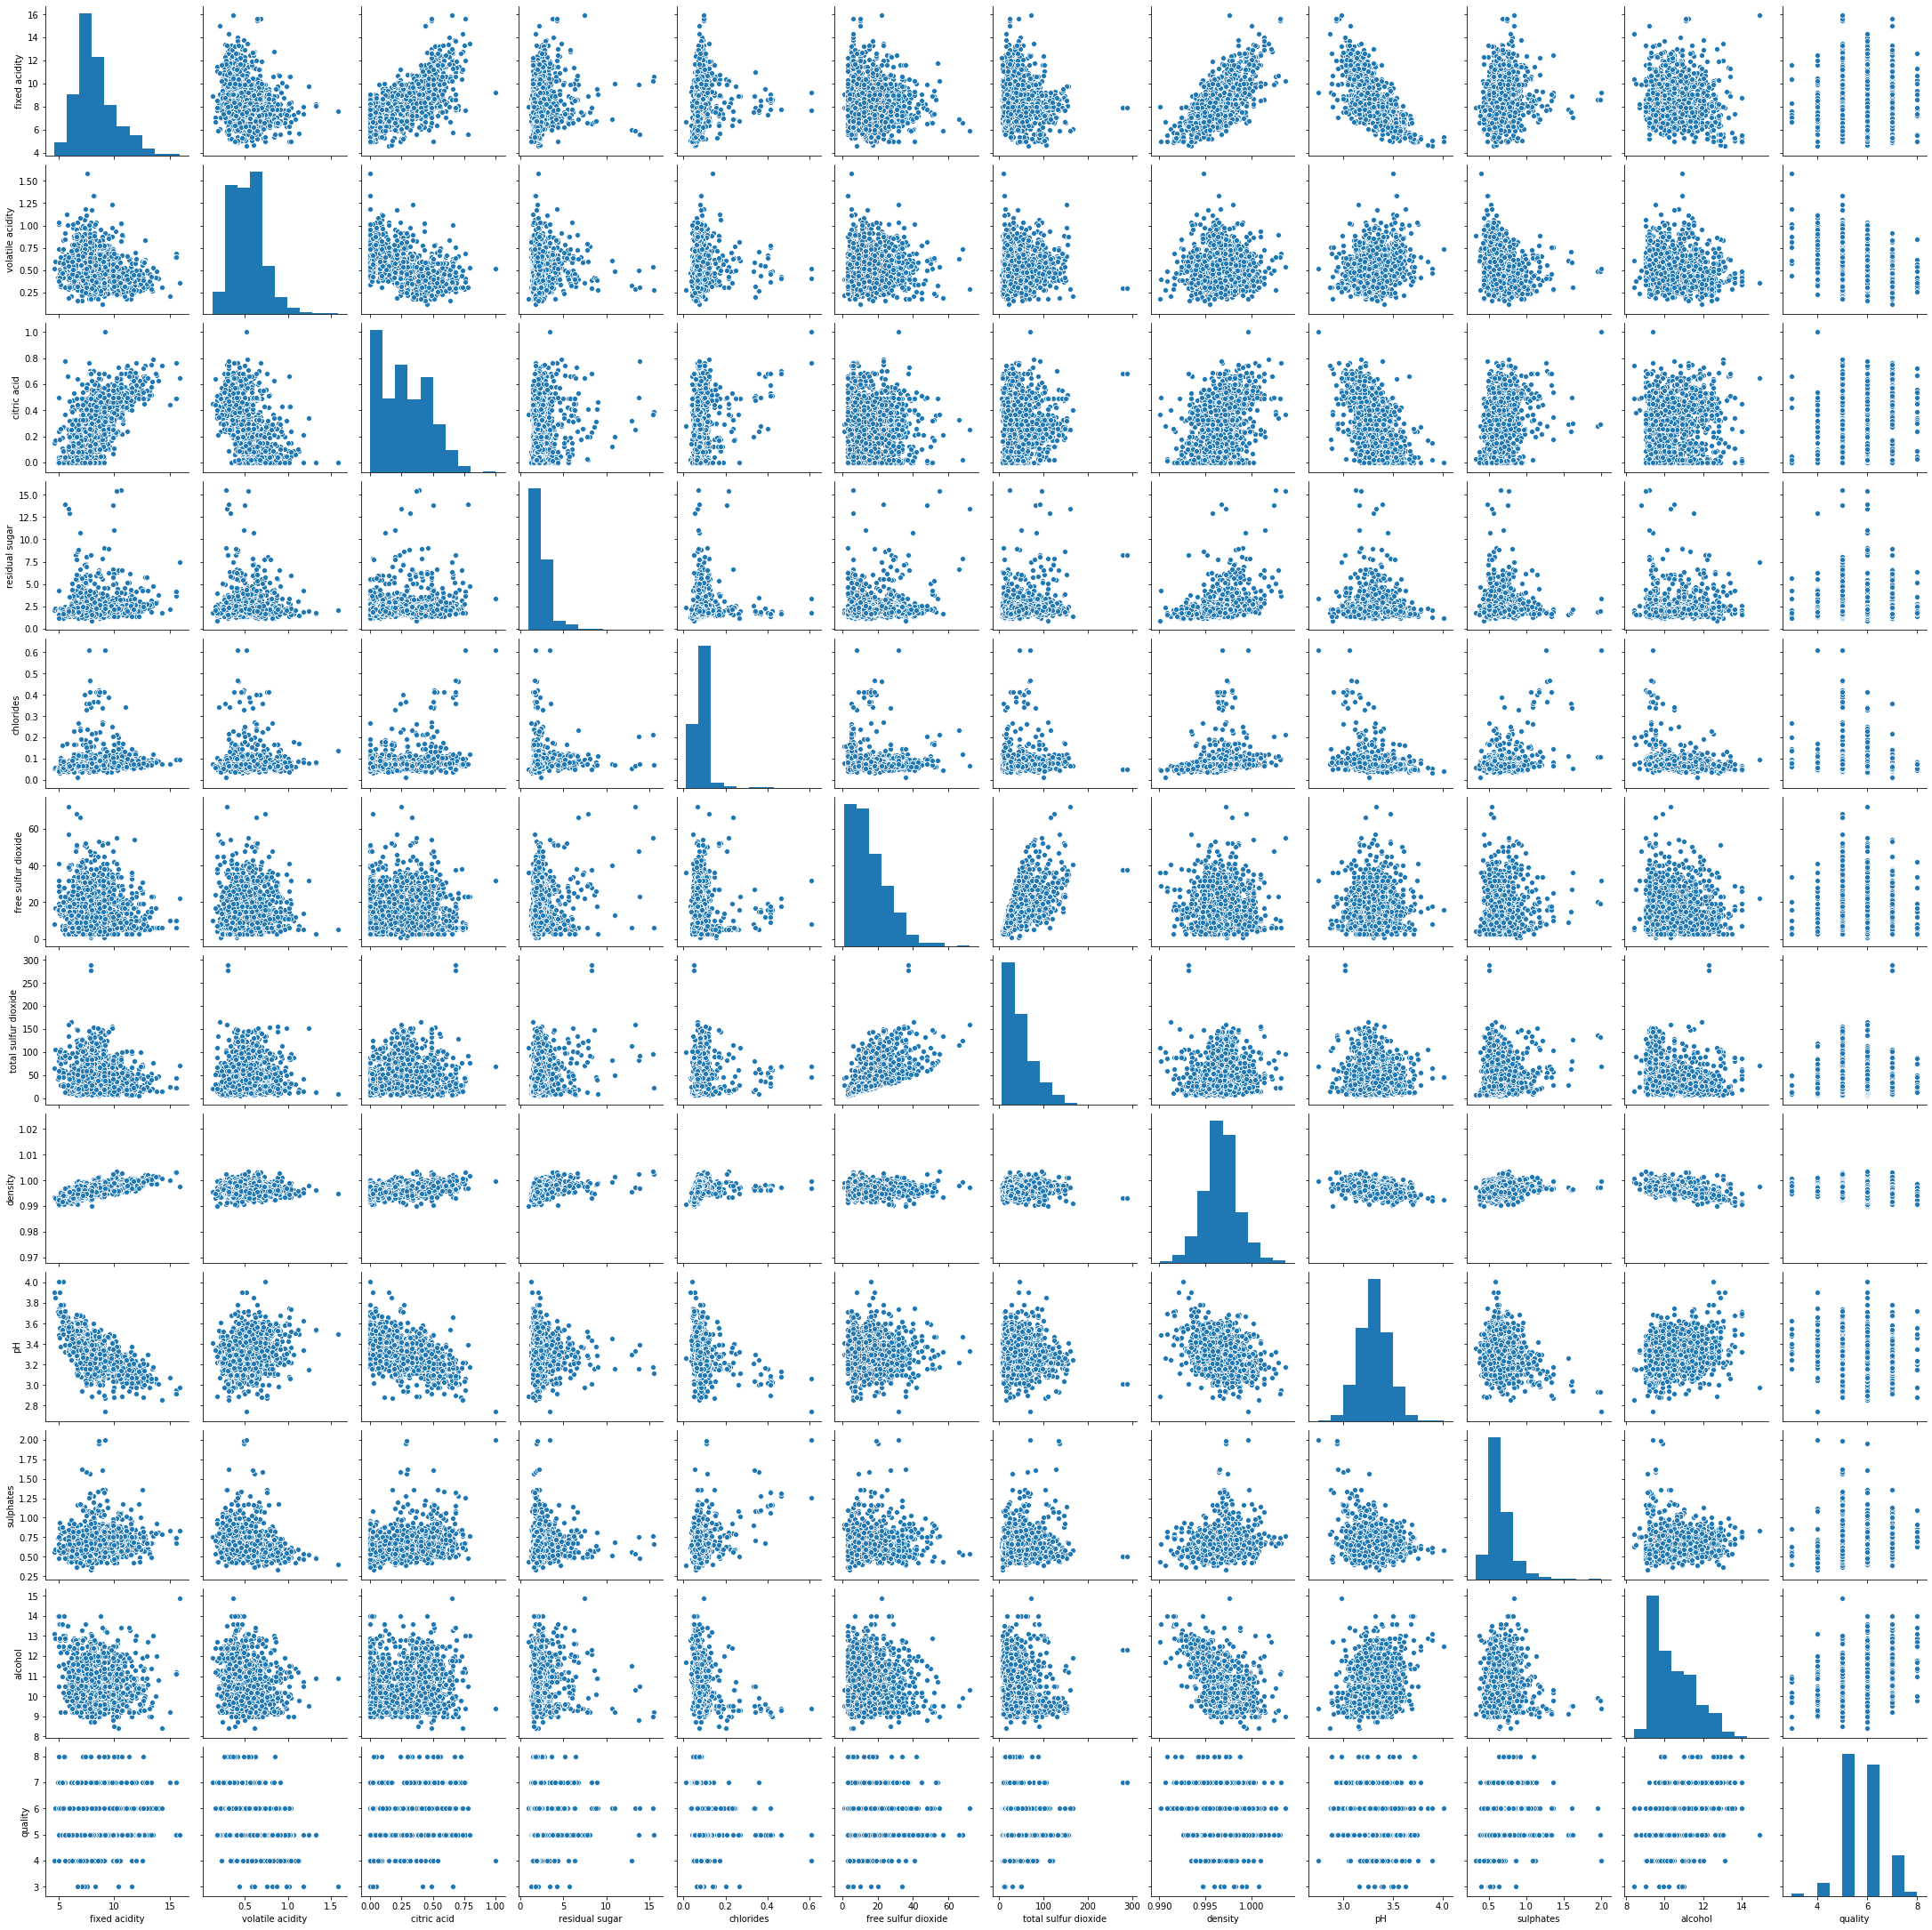

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [ ]:
# I notice that ph is correlated with sugar, citric acidity and fixed acidity, I think I might want to drop ph and either fixed acidity and citric acidity

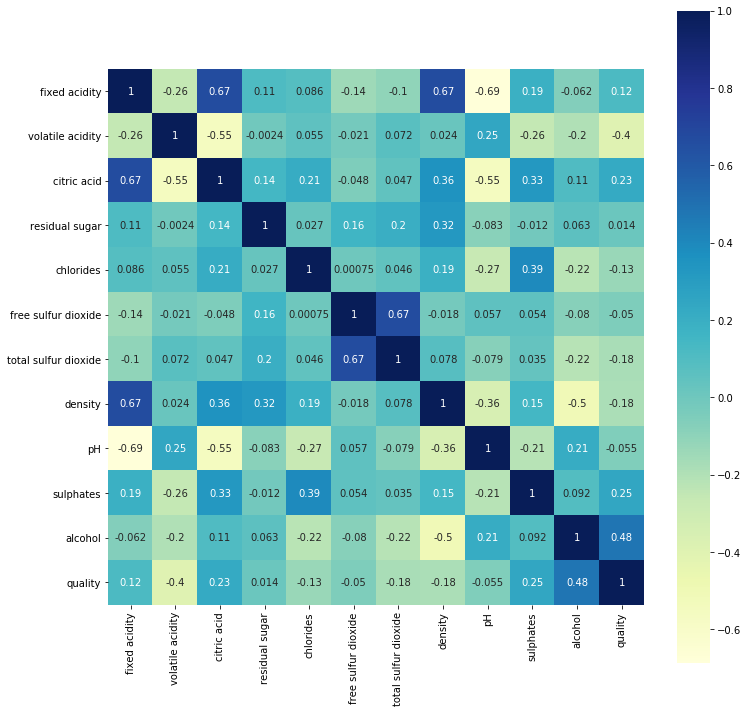

In [13]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, square=True,cmap="YlGnBu")

In [ ]:
# seems like nothing is really highly linearly correlated with a quality, only amount of alcohol and violatile acidity

In [14]:
# I ll have a look of mean values for each scoring to have general idea
group = df.groupby(by='quality').mean()
group

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.171231,0.578596,0.244523,2.509532,0.093971,17.161179,57.406412,0.997082,3.300815,0.623570,9.888562
6,8.337383,0.496084,0.279364,2.457290,0.085075,15.637383,40.816822,0.996565,3.318000,0.674542,10.658879
7,8.858683,0.403653,0.371856,2.716766,0.076832,13.994012,35.449102,0.996051,3.290060,0.742635,11.491118
8,8.441176,0.427647,0.382941,2.576471,0.068353,13.764706,34.470588,0.995095,3.274118,0.774706,12.158824


In [ ]:
# What I see is the more alcohol the better :P

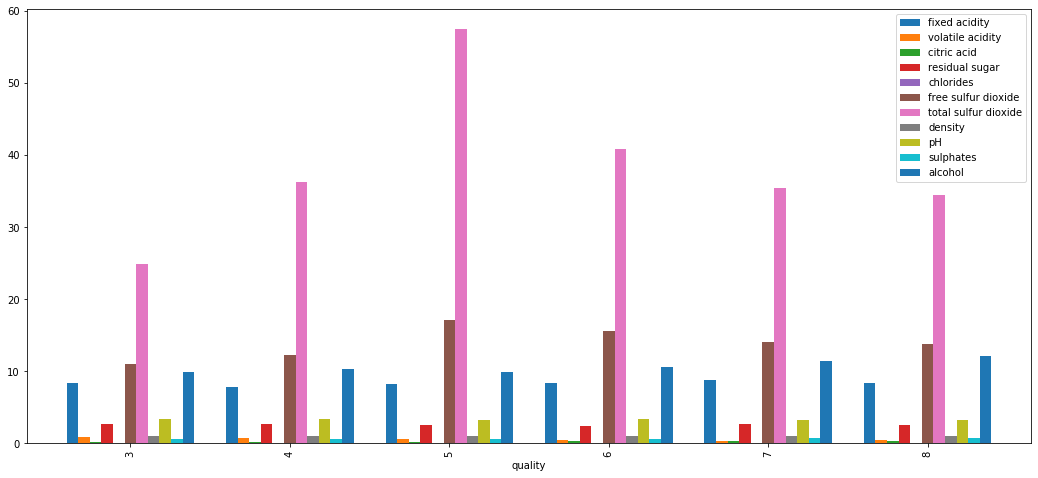

In [15]:
group.plot.bar(figsize=(18,8), width=0.8)
plt.show()

In [16]:
# range is from 3 to 8 ==> there are no really bad portugal red wines ;)

In [ ]:
### I wonder if sulfur dont have to high values to potentially mislead the model, i might want to normalize the big values columns

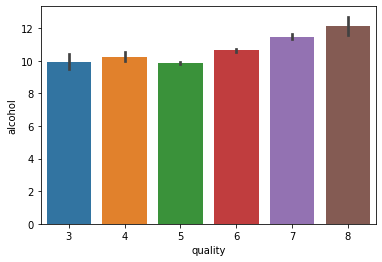

In [17]:
fig = plt.figure(figsize = (6, 4))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

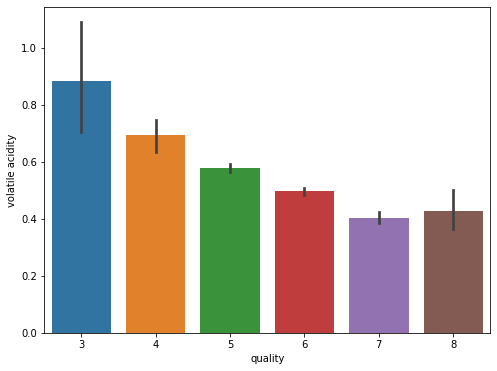

In [18]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

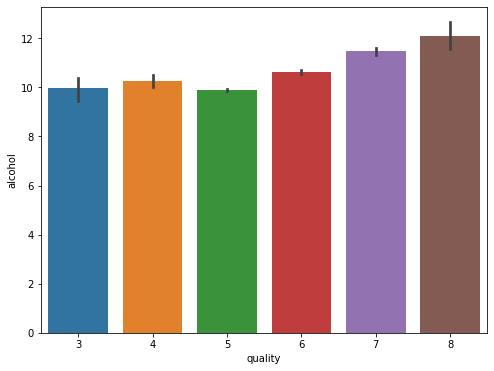

In [19]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

In [20]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

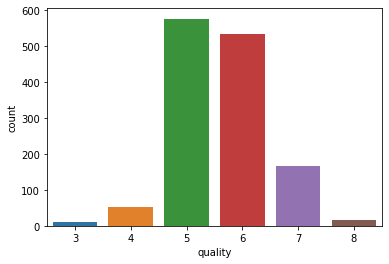

In [21]:
#sns.countplot(y=df.quality)
sns.countplot(df['quality'])

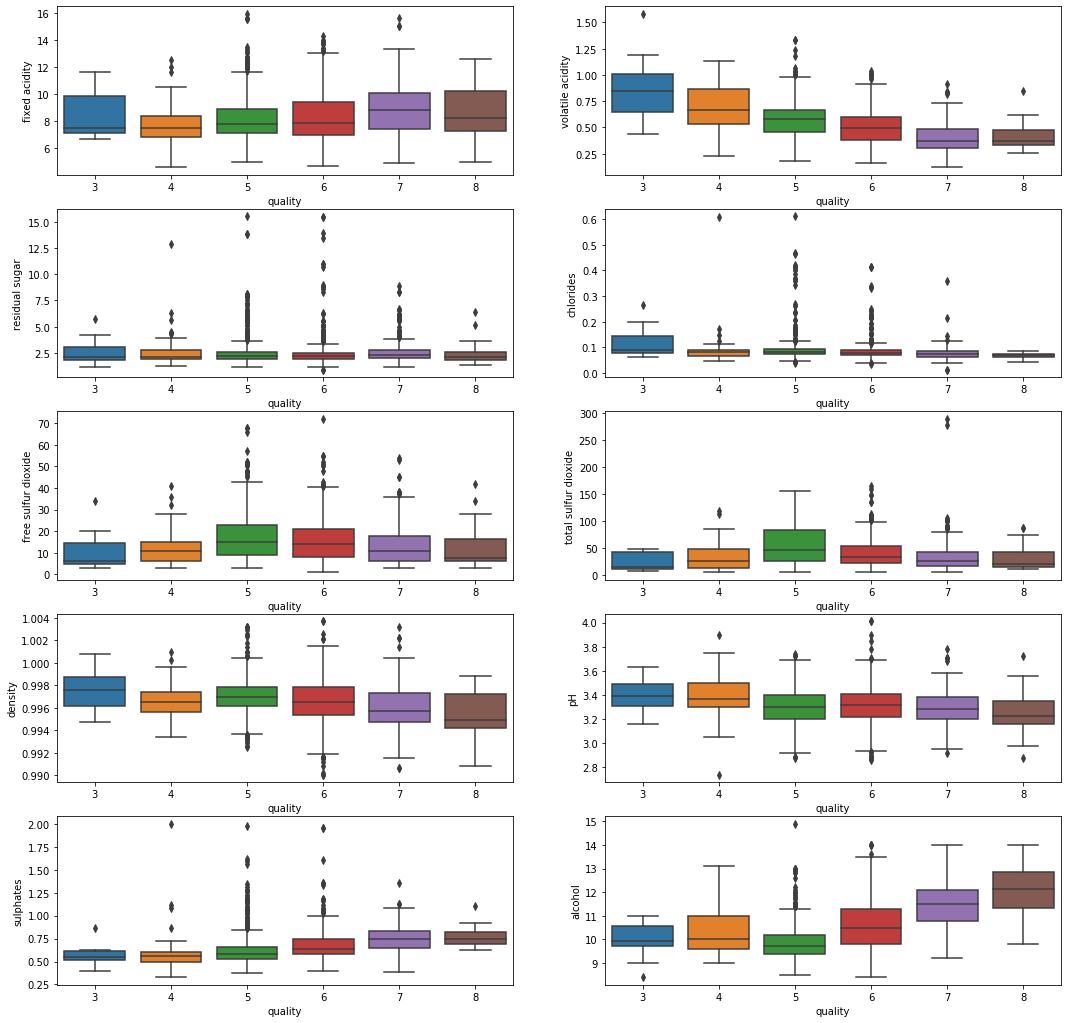

In [23]:
fig, axes = plt.subplots(5,2,figsize=(18,18))


sns.boxplot('quality', 'fixed acidity', data = data, ax=axes[0, 0])
sns.boxplot('quality', 'volatile acidity', data = data, ax=axes[0,1])
sns.boxplot('quality', 'residual sugar', data = data, ax=axes[1,0])
sns.boxplot('quality', 'chlorides', data = data, ax=axes[1,1])
sns.boxplot('quality', 'free sulfur dioxide', data = data, ax=axes[2,0])
sns.boxplot('quality', 'total sulfur dioxide', data = data, ax=axes[2,1])
sns.boxplot('quality', 'density', data = data, ax=axes[3,0])
sns.boxplot('quality', 'pH', data = data, ax=axes[3,1])
sns.boxplot('quality', 'sulphates', data = data, ax=axes[4,0])
sns.boxplot('quality', 'alcohol', data = data, ax=axes[4,1])

In [24]:
# I will change a "quality" column to have only two values since I only want to distinguis good and bad wines
df['quality']=df['quality'].apply(lambda x: 0 if x<6 else 1)
df['quality'].value_counts()

1    719
0    640
Name: quality, dtype: int64

In [25]:
# the ratio of good and bad looks good

# 2. Models

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

## Splitting data

In [27]:
X = df.drop('quality', axis = 1)
y = df.quality

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=1/3, random_state=14)

In [29]:
# checking ratio of good and bad wines in test, train and original
df.quality.value_counts(normalize=True).round(2)

1    0.53
0    0.47
Name: quality, dtype: float64

In [30]:
y_train.value_counts(normalize=True).round(2)

1    0.53
0    0.47
Name: quality, dtype: float64

In [31]:
y_train.value_counts(normalize=True).round(2)

1    0.53
0    0.47
Name: quality, dtype: float64

## Scaling

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model 1 - Logistic Regression

In [34]:
# 1a. not scaled
model1=LogisticRegression(max_iter=1e8).fit(X_train,y_train)
y_pred1=model1.predict(X_test)

conf1=confusion_matrix(y_test,y_pred1)
display(conf1)

acc1=accuracy_score(y_test,y_pred1)
rec1=recall_score(y_test,y_pred1)
pr1=precision_score(y_test,y_pred1)
f11=f1_score(y_test,y_pred1)
print(acc1,pr1,rec1,f11)

array([[160,  55],
       [ 59, 179]], dtype=int64)

0.7483443708609272 0.7649572649572649 0.7521008403361344 0.7584745762711864


In [35]:
#checking if overfitted
confusion_matrix(y_train,model1.predict(X_train))

array([[317, 108],
       [135, 346]], dtype=int64)

In [36]:
# 1b. scaled:
model1b = LogisticRegression(max_iter=1e8).fit(X_train_scaled,y_train)
y_pred1b = model1.predict(X_test_scaled)

conf1b = confusion_matrix(y_test,y_pred1b)
display(conf1b)

acc1b = accuracy_score(y_test,y_pred1b)
rec1b = recall_score(y_test,y_pred1)
pr1b = precision_score(y_test,y_pred1b)
f11b = f1_score(y_test,y_pred1b)
print(acc1b,pr1b,rec1b,f11b)

array([[213,   2],
       [234,   4]], dtype=int64)

0.47902869757174393 0.6666666666666666 0.7521008403361344 0.032786885245901634


In [39]:
# 1c. weight balanced
model1c = LogisticRegression(max_iter=1e8, class_weight='balanced').fit(X_train,y_train)
y_pred1c = model1c.predict(X_test)

conf1c = confusion_matrix(y_test,y_pred1c)
display(conf1c)

acc1c = accuracy_score(y_test,y_pred1c).round(3)
rec1c = recall_score(y_test,y_pred1c).round(3)
pr1c = precision_score(y_test,y_pred1c).round(3)
f11c = f1_score(y_test,y_pred1c).round(3)
print(acc1c,pr1c,rec1c,f11c)

array([[167,  48],
       [ 67, 171]], dtype=int64)

0.746 0.781 0.718 0.748


In [40]:
# 1d. I will try to select columns via PCA

from sklearn.decomposition import PCA

pca=PCA()
pca.fit(X_train_scaled)

X_train_pca=pd.DataFrame(pca.transform(X_train_scaled), columns=[f'PC{i}' for i in range(pca.singular_values_.shape[0])])
X_test_pca=pd.DataFrame(pca.transform(X_test_scaled), columns=[f'PC{i}' for i in range(pca.singular_values_.shape[0])])
X_test_pca

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.208338,1.905503,-0.070843,-0.880980,0.210118,0.604820,0.223669,-0.035110,-0.825590,-0.098698,0.093688
1,1.599586,-0.837999,0.007450,-0.062694,-0.315713,0.475200,0.075107,-0.208750,-0.117647,-0.295593,-0.030541
2,-1.533705,0.737735,-1.450698,-0.006205,0.050533,-0.636229,0.127896,-0.093697,-0.612772,-0.033633,0.182537
3,-0.642959,0.735914,1.040615,-0.406113,-0.462985,-0.210686,0.238819,-0.293774,-0.463301,0.011928,0.014288
4,1.408513,-0.352440,-0.726473,4.314627,1.603656,0.922207,1.676098,-0.849628,-0.871422,-0.939125,0.122612
...,...,...,...,...,...,...,...,...,...,...,...
448,-0.683223,-0.484961,-0.257023,-0.483969,1.985959,0.216629,-0.627643,-0.256603,0.037823,0.671529,-0.207560
449,-1.551427,1.312121,0.140704,0.055600,-0.611222,0.762627,0.136801,0.159288,0.699698,-0.571968,0.029655
450,-1.473049,-0.883359,-0.634006,0.193549,-0.645624,-0.912184,1.388421,0.271106,0.195734,0.127621,0.026946
451,2.111080,-1.920048,0.593431,0.540267,-0.159157,-1.311918,-0.559128,0.637262,0.216405,-0.242374,-0.211716


In [41]:
# 1d with columns selection via PCA
model1d = LogisticRegression(max_iter=1e8).fit(X_train_pca,y_train)

y_pred1d = model1d.predict(X_test_pca)
conf1d = confusion_matrix(y_test,y_pred1d)
display(conf1d)

acc1d=accuracy_score(y_test,y_pred1d).round(3)
rec1d=recall_score(y_test,y_pred1d).round(3)
pr1d=precision_score(y_test,y_pred1d).round(3)
f11d=f1_score(y_test,y_pred1d).round(3)
print(acc1d,pr1d,rec1d,f11d)

array([[159,  56],
       [ 56, 182]], dtype=int64)

0.753 0.765 0.765 0.765


In [ ]:
# so far, this is the best result I got
# I will try to build different models and see if I can get it beter

## Model 2 - KNN

In [42]:
# 2a

model2=KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
y_pred2=model2.predict(X_test)

conf2=confusion_matrix(y_test,y_pred2)
display(conf2)

acc2=accuracy_score(y_test,y_pred2).round(3)
rec2=recall_score(y_test,y_pred2).round(3)
pr2=precision_score(y_test,y_pred2).round(3)
f12=f1_score(y_test,y_pred2).round(3)
print(acc2,pr2,rec2,f12)

array([[142,  73],
       [ 91, 147]], dtype=int64)

0.638 0.668 0.618 0.642


In [43]:
# 2b scaled

model2b = KNeighborsClassifier(n_neighbors=7).fit(X_train_scaled,y_train)
y_pred2b = model2.predict(X_test_scaled)

conf2b = confusion_matrix(y_test,y_pred2b)
display(conf2b)

acc2b=accuracy_score(y_test,y_pred2b).round(3)
rec2b=recall_score(y_test,y_pred2b).round(3)
pr2b=precision_score(y_test,y_pred2b).round(3)
f12b=f1_score(y_test,y_pred2b).round(3)
print(acc2b,pr2b,rec2b,f12b)

array([[215,   0],
       [238,   0]], dtype=int64)

0.475 0.0 0.0 0.0


In [44]:
# 2c wicth PCA columns

model2c = KNeighborsClassifier(n_neighbors=7).fit(X_train_pca,y_train)
y_pred2c = model2c.predict(X_test_pca)

conf2c = confusion_matrix(y_test,y_pred2c)
display(conf2c)

acc2c=accuracy_score(y_test,y_pred2c).round(3)
rec2c=recall_score(y_test,y_pred2c).round(3)
pr2c=precision_score(y_test,y_pred2c).round(3)
f12c=f1_score(y_test,y_pred2c).round(3)
print(acc2c,pr2c,rec2c,f12c)

array([[139,  76],
       [ 61, 177]], dtype=int64)

0.698 0.7 0.744 0.721


## Model 3 - XGBoost

In [46]:
# 3a

model3 = XGBClassifier().fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

conf3 = confusion_matrix(y_test,y_pred3)
display(conf3)

acc3 = accuracy_score(y_test,y_pred3).round(3)
rec3 = recall_score(y_test,y_pred3).round(3)
pr3 = precision_score(y_test,y_pred3).round(3)
f13=f1_score(y_test,y_pred3).round(3)

print(acc3,pr3,rec3,f13)

array([[160,  55],
       [ 49, 189]], dtype=int64)

0.77 0.775 0.794 0.784


In [47]:
# 3b
# let s try to make it better with PCA

model3b = XGBClassifier().fit(X_train_pca,y_train)
y_pred3b = model3b.predict(X_test_pca)

conf3b = confusion_matrix(y_test,y_pred3b)
display(conf3b)

acc3b = accuracy_score(y_test,y_pred3b).round(3)
rec3b = recall_score(y_test,y_pred3b).round(3)
pr3b = precision_score(y_test,y_pred3b).round(3)
f13b = f1_score(y_test,y_pred3b).round(3)

print(acc3b,pr3b,rec3b,f13b)


array([[161,  54],
       [ 57, 181]], dtype=int64)

0.755 0.77 0.761 0.765


## Model 4 - CatBoost

In [49]:
# 4a

model4 = CatBoostClassifier().fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

conf4 = confusion_matrix(y_test,y_pred4)
display(conf4)

acc4 = accuracy_score(y_test,y_pred4).round(3)
rec4 = recall_score(y_test,y_pred4).round(3)
pr4 = precision_score(y_test,y_pred4).round(3)
f14 = f1_score(y_test,y_pred4).round(3)

print(acc4,pr4,rec4,f14)

Learning rate set to 0.016293
0:	learn: 0.6871082	total: 151ms	remaining: 2m 30s
1:	learn: 0.6811483	total: 155ms	remaining: 1m 17s
2:	learn: 0.6746795	total: 158ms	remaining: 52.4s
3:	learn: 0.6687415	total: 161ms	remaining: 40.1s
4:	learn: 0.6625472	total: 169ms	remaining: 33.7s
5:	learn: 0.6576443	total: 176ms	remaining: 29.1s
6:	learn: 0.6521792	total: 179ms	remaining: 25.4s
7:	learn: 0.6466095	total: 183ms	remaining: 22.6s
8:	learn: 0.6412154	total: 186ms	remaining: 20.5s
9:	learn: 0.6354246	total: 191ms	remaining: 18.9s
10:	learn: 0.6303696	total: 193ms	remaining: 17.4s
11:	learn: 0.6260907	total: 196ms	remaining: 16.1s
12:	learn: 0.6211407	total: 199ms	remaining: 15.1s
13:	learn: 0.6167848	total: 202ms	remaining: 14.2s
14:	learn: 0.6135486	total: 204ms	remaining: 13.4s
15:	learn: 0.6097869	total: 210ms	remaining: 12.9s
16:	learn: 0.6055135	total: 213ms	remaining: 12.3s
17:	learn: 0.6019178	total: 215ms	remaining: 11.7s
18:	learn: 0.5974611	total: 218ms	remaining: 11.3s
19:	learn

176:	learn: 0.4038420	total: 770ms	remaining: 3.58s
177:	learn: 0.4030597	total: 785ms	remaining: 3.62s
178:	learn: 0.4026702	total: 792ms	remaining: 3.63s
179:	learn: 0.4023891	total: 797ms	remaining: 3.63s
180:	learn: 0.4020372	total: 800ms	remaining: 3.62s
181:	learn: 0.4014118	total: 803ms	remaining: 3.61s
182:	learn: 0.4009204	total: 806ms	remaining: 3.6s
183:	learn: 0.4002633	total: 809ms	remaining: 3.59s
184:	learn: 0.3997085	total: 813ms	remaining: 3.58s
185:	learn: 0.3993705	total: 818ms	remaining: 3.58s
186:	learn: 0.3985956	total: 821ms	remaining: 3.57s
187:	learn: 0.3983573	total: 825ms	remaining: 3.56s
188:	learn: 0.3981164	total: 830ms	remaining: 3.56s
189:	learn: 0.3978066	total: 834ms	remaining: 3.56s
190:	learn: 0.3975343	total: 837ms	remaining: 3.55s
191:	learn: 0.3968135	total: 841ms	remaining: 3.54s
192:	learn: 0.3957686	total: 844ms	remaining: 3.53s
193:	learn: 0.3954075	total: 848ms	remaining: 3.52s
194:	learn: 0.3948121	total: 854ms	remaining: 3.52s
195:	learn: 0

374:	learn: 0.3267534	total: 1.55s	remaining: 2.59s
375:	learn: 0.3264335	total: 1.55s	remaining: 2.58s
376:	learn: 0.3257470	total: 1.56s	remaining: 2.58s
377:	learn: 0.3255226	total: 1.56s	remaining: 2.57s
378:	learn: 0.3252449	total: 1.56s	remaining: 2.56s
379:	learn: 0.3248075	total: 1.57s	remaining: 2.56s
380:	learn: 0.3242743	total: 1.57s	remaining: 2.55s
381:	learn: 0.3239448	total: 1.57s	remaining: 2.54s
382:	learn: 0.3234804	total: 1.57s	remaining: 2.54s
383:	learn: 0.3232340	total: 1.58s	remaining: 2.53s
384:	learn: 0.3224858	total: 1.58s	remaining: 2.52s
385:	learn: 0.3222010	total: 1.58s	remaining: 2.52s
386:	learn: 0.3220619	total: 1.58s	remaining: 2.51s
387:	learn: 0.3217613	total: 1.59s	remaining: 2.5s
388:	learn: 0.3214910	total: 1.59s	remaining: 2.5s
389:	learn: 0.3213974	total: 1.59s	remaining: 2.49s
390:	learn: 0.3210480	total: 1.59s	remaining: 2.48s
391:	learn: 0.3206819	total: 1.6s	remaining: 2.48s
392:	learn: 0.3203953	total: 1.6s	remaining: 2.47s
393:	learn: 0.32

537:	learn: 0.2693952	total: 2.05s	remaining: 1.76s
538:	learn: 0.2689831	total: 2.06s	remaining: 1.76s
539:	learn: 0.2687305	total: 2.06s	remaining: 1.75s
540:	learn: 0.2682887	total: 2.06s	remaining: 1.75s
541:	learn: 0.2679187	total: 2.07s	remaining: 1.75s
542:	learn: 0.2678770	total: 2.07s	remaining: 1.74s
543:	learn: 0.2675544	total: 2.08s	remaining: 1.74s
544:	learn: 0.2670009	total: 2.08s	remaining: 1.74s
545:	learn: 0.2669560	total: 2.09s	remaining: 1.73s
546:	learn: 0.2665461	total: 2.09s	remaining: 1.73s
547:	learn: 0.2661200	total: 2.09s	remaining: 1.73s
548:	learn: 0.2655992	total: 2.1s	remaining: 1.72s
549:	learn: 0.2648689	total: 2.1s	remaining: 1.72s
550:	learn: 0.2644521	total: 2.1s	remaining: 1.71s
551:	learn: 0.2641334	total: 2.1s	remaining: 1.71s
552:	learn: 0.2640955	total: 2.11s	remaining: 1.71s
553:	learn: 0.2636203	total: 2.12s	remaining: 1.7s
554:	learn: 0.2632900	total: 2.12s	remaining: 1.7s
555:	learn: 0.2627626	total: 2.12s	remaining: 1.7s
556:	learn: 0.26241

701:	learn: 0.2160663	total: 2.69s	remaining: 1.14s
702:	learn: 0.2155676	total: 2.69s	remaining: 1.14s
703:	learn: 0.2151744	total: 2.69s	remaining: 1.13s
704:	learn: 0.2148780	total: 2.7s	remaining: 1.13s
705:	learn: 0.2145543	total: 2.7s	remaining: 1.12s
706:	learn: 0.2142488	total: 2.7s	remaining: 1.12s
707:	learn: 0.2142293	total: 2.7s	remaining: 1.11s
708:	learn: 0.2140141	total: 2.71s	remaining: 1.11s
709:	learn: 0.2136852	total: 2.71s	remaining: 1.11s
710:	learn: 0.2135439	total: 2.71s	remaining: 1.1s
711:	learn: 0.2130521	total: 2.71s	remaining: 1.1s
712:	learn: 0.2129914	total: 2.72s	remaining: 1.09s
713:	learn: 0.2128393	total: 2.72s	remaining: 1.09s
714:	learn: 0.2126517	total: 2.72s	remaining: 1.08s
715:	learn: 0.2122546	total: 2.73s	remaining: 1.08s
716:	learn: 0.2118983	total: 2.73s	remaining: 1.08s
717:	learn: 0.2117121	total: 2.73s	remaining: 1.07s
718:	learn: 0.2115073	total: 2.73s	remaining: 1.07s
719:	learn: 0.2110219	total: 2.73s	remaining: 1.06s
720:	learn: 0.2108

883:	learn: 0.1708463	total: 3.18s	remaining: 417ms
884:	learn: 0.1705078	total: 3.18s	remaining: 413ms
885:	learn: 0.1702204	total: 3.18s	remaining: 409ms
886:	learn: 0.1701003	total: 3.18s	remaining: 406ms
887:	learn: 0.1700870	total: 3.19s	remaining: 402ms
888:	learn: 0.1698651	total: 3.19s	remaining: 398ms
889:	learn: 0.1695928	total: 3.19s	remaining: 394ms
890:	learn: 0.1694069	total: 3.19s	remaining: 391ms
891:	learn: 0.1692068	total: 3.2s	remaining: 387ms
892:	learn: 0.1691534	total: 3.2s	remaining: 383ms
893:	learn: 0.1689134	total: 3.2s	remaining: 380ms
894:	learn: 0.1687526	total: 3.2s	remaining: 376ms
895:	learn: 0.1683957	total: 3.21s	remaining: 372ms
896:	learn: 0.1681663	total: 3.21s	remaining: 368ms
897:	learn: 0.1680602	total: 3.21s	remaining: 365ms
898:	learn: 0.1678119	total: 3.21s	remaining: 361ms
899:	learn: 0.1675387	total: 3.22s	remaining: 358ms
900:	learn: 0.1675258	total: 3.22s	remaining: 354ms
901:	learn: 0.1673123	total: 3.22s	remaining: 350ms
902:	learn: 0.16

array([[159,  56],
       [ 51, 187]], dtype=int64)

0.764 0.77 0.786 0.778


## Model 5 - ADABoost

In [53]:
model5 = AdaBoostClassifier().fit(X_train,y_train)
y_pred5 = model5.predict(X_test)

conf5 = confusion_matrix(y_test,y_pred5)
display(conf5)

acc5=accuracy_score(y_test,y_pred5).round(3)
rec5=recall_score(y_test,y_pred5).round(3)
pr5=precision_score(y_test,y_pred5).round(3)
f15=f1_score(y_test,y_pred5).round(3)
print(acc5,pr5,rec5,f15)

array([[145,  70],
       [ 59, 179]], dtype=int64)

0.715 0.719 0.752 0.735


## Model 6 - Decision Tree

In [54]:
model6 = DecisionTreeClassifier().fit(X_train,y_train)
y_pred6 = model6.predict(X_test)

conf6 = confusion_matrix(y_test,y_pred6)
display(conf6)

acc6=accuracy_score(y_test,y_pred6).round(3)
rec6=recall_score(y_test,y_pred6).round(3)
pr6=precision_score(y_test,y_pred6).round(3)
f16=f1_score(y_test,y_pred6).round(3)
print(acc6,pr6,rec6,f16)

array([[148,  67],
       [ 84, 154]], dtype=int64)

0.667 0.697 0.647 0.671


In [56]:
model6a = DecisionTreeClassifier(max_depth=18).fit(X_train,y_train)
y_pred6a = model6a.predict(X_test)

conf6a = confusion_matrix(y_test,y_pred6a)
display(conf6a)

acc6a=accuracy_score(y_test,y_pred6a).round(3)
rec6a=recall_score(y_test,y_pred6a).round(3)
pr6a=precision_score(y_test,y_pred6a).round(3)
f16a=f1_score(y_test,y_pred6a).round(3)
print(acc6a,pr6a,rec6a,f16a)

array([[145,  70],
       [ 78, 160]], dtype=int64)

0.673 0.696 0.672 0.684


## Model 7 - Random Forest

In [57]:
model7 = RandomForestClassifier().fit(X_train,y_train)
y_pred7 = model7.predict(X_test)

conf7 = confusion_matrix(y_test,y_pred7)
display(conf7)

acc7=accuracy_score(y_test,y_pred7).round(3)
rec7=recall_score(y_test,y_pred7).round(3)
pr7=precision_score(y_test,y_pred7).round(3)
f17=f1_score(y_test,y_pred7).round(3)
print(acc7,pr7,rec7,f17)

array([[156,  59],
       [ 47, 191]], dtype=int64)

0.766 0.764 0.803 0.783


In [60]:
model7b = RandomForestClassifier().fit(X_train_scaled,y_train)
y_pred7b = model7b.predict(X_test_scaled)

conf7b = confusion_matrix(y_test,y_pred7b)
display(conf7b)

acc7b=accuracy_score(y_test,y_pred7b).round(3)
rec7b=recall_score(y_test,y_pred7b).round(3)
pr7b=precision_score(y_test,y_pred7b).round(3)
f17b=f1_score(y_test,y_pred7b).round(3)
print(acc7b,pr7b,rec7b,f17b)

array([[155,  60],
       [ 48, 190]], dtype=int64)

0.762 0.76 0.798 0.779


In [61]:
model7c = RandomForestClassifier().fit(X_train_pca,y_train)
y_pred7c = model7c.predict(X_test_pca)

conf7c = confusion_matrix(y_test,y_pred7c)
display(conf7c)

acc7c=accuracy_score(y_test,y_pred7c).round(3)
rec7c=recall_score(y_test,y_pred7c).round(3)
pr7c=precision_score(y_test,y_pred7c).round(3)
f17c=f1_score(y_test,y_pred7c).round(3)
print(acc7c,pr7c,rec7c,f17c)

array([[155,  60],
       [ 63, 175]], dtype=int64)

0.728 0.745 0.735 0.74


In [62]:
model8 = RandomForestClassifier(class_weight='balanced').fit(X_train,y_train)
y_pred8 = model8.predict(X_test)

conf8 = confusion_matrix(y_test,y_pred8)
display(conf8)

acc8=accuracy_score(y_test,y_pred8).round(3)
rec8=recall_score(y_test,y_pred8).round(3)
pr8=precision_score(y_test,y_pred8).round(3)
f18=f1_score(y_test,y_pred8).round(3)
print(acc8,pr8,rec8,f18)

array([[159,  56],
       [ 47, 191]], dtype=int64)

0.773 0.773 0.803 0.788


## Model 9 - Gaussian

In [63]:
model9 = GaussianNB().fit(X_train,y_train)
y_pred9=model9.predict(X_test)

conf9 = confusion_matrix(y_test,y_pred9)
display(conf9)

acc9=accuracy_score(y_test,y_pred9).round(3)
rec9=recall_score(y_test,y_pred9).round(3)
pr9=precision_score(y_test,y_pred9).round(3)
f19=f1_score(y_test,y_pred9).round(3)
print(acc9,pr9,rec9,f19)

array([[159,  56],
       [ 65, 173]], dtype=int64)

0.733 0.755 0.727 0.741


## Model 10 - NuSVC

In [64]:
from sklearn.svm import NuSVC

model10 = NuSVC(nu=0.1).fit(X_train,y_train)
y_pred10 = model10.predict(X_test)

conf10 = confusion_matrix(y_test,y_pred10)
display(conf10)

acc10=accuracy_score(y_test,y_pred10).round(3)
rec10=recall_score(y_test,y_pred10).round(3)
pr10=precision_score(y_test,y_pred10).round(3)
f110=f1_score(y_test,y_pred10).round(3)
print(acc10,pr10,rec10,f110)

array([[103, 112],
       [ 66, 172]], dtype=int64)

0.607 0.606 0.723 0.659


## Additional ROC testing

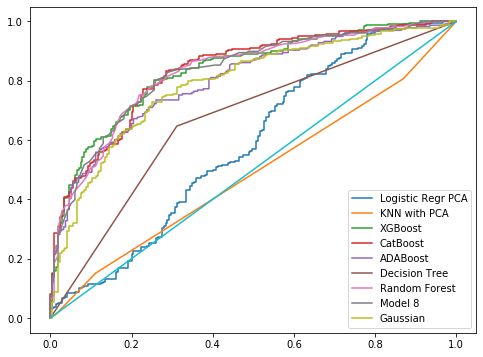

In [68]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

model_roc1=roc_auc_score(y_test, y_pred1d)
model_roc2=roc_auc_score(y_test, y_pred2c)
model_roc3=roc_auc_score(y_test, y_pred3)
model_roc4=roc_auc_score(y_test, y_pred4)
model_roc5=roc_auc_score(y_test, y_pred5)
model_roc6=roc_auc_score(y_test, y_pred6)
model_roc7=roc_auc_score(y_test, y_pred7)
model_roc8=roc_auc_score(y_test, y_pred8)
model_roc9=roc_auc_score(y_test, y_pred9)
model_roc10=roc_auc_score(y_test, y_pred10)




fpr1,tpr1,thresholds1=roc_curve(y_test, model1d.predict_proba(X_test)[:,1])
fpr2,tpr2,thresholds1=roc_curve(y_test, model2c.predict_proba(X_test)[:,1])
fpr3,tpr3,thresholds1=roc_curve(y_test, model3.predict_proba(X_test)[:,1])
fpr4,tpr4,thresholds1=roc_curve(y_test, model4.predict_proba(X_test)[:,1])
fpr5,tpr5,thresholds1=roc_curve(y_test, model5.predict_proba(X_test)[:,1])
fpr6,tpr6,thresholds1=roc_curve(y_test, model6.predict_proba(X_test)[:,1])
fpr7,tpr7,thresholds1=roc_curve(y_test, model7.predict_proba(X_test)[:,1])
fpr8,tpr8,thresholds1=roc_curve(y_test, model8.predict_proba(X_test)[:,1])
fpr9,tpr9,thresholds1=roc_curve(y_test, model9.predict_proba(X_test)[:,1])
#fpr10,tp101,thresholds1=roc_curve(y_test, model10.predict_proba(X_test)[:,1])
#fpr11,tpr11,thresholds1=roc_curve(y_test, model11.predict_proba(X_test)[:,1])


plt.figure(figsize=(8,6))
plt.plot(fpr1,tpr1, label=f'Logistic Regr PCA')
plt.plot(fpr2,tpr2, label=f'KNN with PCA')
plt.plot(fpr3,tpr3, label=f'XGBoost')
plt.plot(fpr4,tpr4, label=f'CatBoost')
plt.plot(fpr5,tpr5, label=f'ADABoost')
plt.plot(fpr6,tpr6, label=f'Decision Tree')
plt.plot(fpr7,tpr7, label=f'Random Forest')
plt.plot(fpr8,tpr8, label=f'Model 8')
plt.plot(fpr9,tpr9, label=f'Gaussian')
#plt.plot(fpr10,tpr10, label=f'NuSVC')



plt.plot([0,1],[0,1])
plt.legend()
plt.show()

In [69]:
models = [('Logistic Regression with PCA', acc1d, rec1d, pr1d, f11d, model_roc1),
          ('K-Nearest Neighbors with PCA',acc2c, rec2c, pr2c, f12c, model_roc2),
          ('XGBoost', acc3, rec3, pr3, f13, model_roc3),
          ('CatBoost', acc4, rec4, pr4, f14, model_roc4),
          ('ADABoost', acc5, rec5, pr5, f15, model_roc5),
          ('Decision Tree', acc6, rec6, pr6, f16, model_roc6),
          ('Random Forest', acc7, rec7, pr7, f17, model_roc7),
          ('Gaussian', acc9, rec9, pr9, f19, model_roc9),
          ('NuSVC', acc10, rec10, pr10, f110, model_roc10)]
           
           
           
models_results = pd.DataFrame(data = models, columns=['Model', 'ACC', 'REC', 'PR', 'F1', 'ROC'])
models_results

,Model,ACC,REC,PR,F1,ROC
0,Logistic Regression with PCA,0.753,0.765,0.765,0.765,0.752120
1,K-Nearest Neighbors with PCA,0.698,0.744,0.700,0.721,0.695105
2,XGBoost,0.770,0.794,0.775,0.784,0.769152
3,CatBoost,0.764,0.786,0.770,0.778,0.762625
4,ADABoost,0.715,0.752,0.719,0.735,0.713260
5,Decision Tree,0.667,0.647,0.697,0.671,0.667715
6,Random Forest,0.766,0.803,0.764,0.783,0.764051
7,Gaussian,0.733,0.727,0.755,0.741,0.733213
8,NuSVC,0.607,0.723,0.606,0.659,0.600879


In [70]:
models_results.describe()

,ACC,REC,PR,F1,ROC
count,9.000000,9.00000,9.000000,9.000000,9.000000
mean,0.719222,0.74900,0.727889,0.737444,0.717569
std,0.054648,0.04765,0.054860,0.046776,0.055807
min,0.607000,0.64700,0.606000,0.659000,0.600879
25%,0.698000,0.72700,0.700000,0.721000,0.695105
50%,0.733000,0.75200,0.755000,0.741000,0.733213
75%,0.764000,0.78600,0.765000,0.778000,0.762625
max,0.770000,0.80300,0.775000,0.784000,0.769152


In [71]:
# XGBoost achieved best results

[]

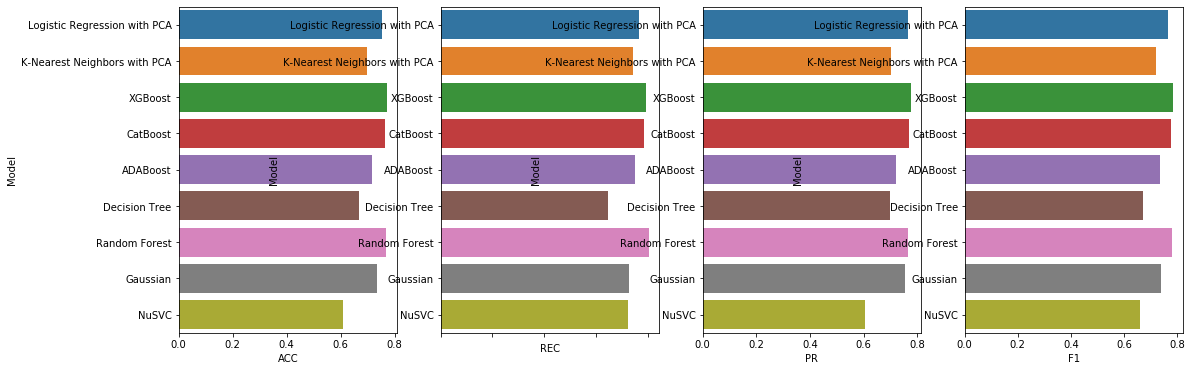

In [72]:
fig, axes = plt.subplots(1,4, figsize=(18,6))

sns.barplot(x='ACC', y='Model', data = models_results, ax = axes[0])
sns.barplot(x='REC', y='Model', data = models_results, ax = axes[1])
sns.barplot(x='PR', y='Model', data = models_results, ax = axes[2])
sns.barplot(x='F1', y='Model', data = models_results, ax = axes[3])


#axes[0].set_xlabel('Accuracy (Training)', size=16)
#axes[0].set_ylabel('Model')
#axes[0].set_xlim(0,1.0)
#axes[1].set_xticks(np.arange(0, 1.1, 0.1))
#axes[1].set_xticks([])
#axes[2].set_xticks([])
#axes[3].set_xticks([])
axes[1].xaxis.set_ticklabels([])

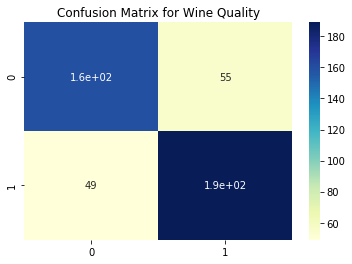


Classification Report

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       215
           1       0.76      0.80      0.78       238

    accuracy                           0.77       453
   macro avg       0.77      0.76      0.76       453
weighted avg       0.77      0.77      0.77       453



In [73]:
plt.title('Confusion Matrix for Wine Quality')
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred3)), annot = True, cmap="YlGnBu")
plt.show()

from sklearn.metrics import classification_report

print('\nClassification Report\n')
print(classification_report(y_test, y_pred7))

In [78]:
import eli5
#eli5.show_prediction(model3)
row = 7
print('Real:', y_test.iloc[row])
print('Predicted:', y_pred3[row])
eli5.show_prediction(model3, X_test.iloc[row], 
                     feature_names=list(X.columns), show_feature_values=True)

Real: 1
Predicted: 1


In [79]:
row = 14
print('Real:', y_test.iloc[row])
print('Predicted:', y_pred3[row])
eli5.show_prediction(model3, X_test.iloc[row], 
                     feature_names=list(X.columns), show_feature_values=True)

Real: 1
Predicted: 0
